# TP2 : Exploration de l'année 1847

## Vérification des 2833 fichiers PDFs téléchargés

### Importations

In [4]:
import os
import re
import time
import requests

### Définition des chemins

In [5]:
pdf_path = '../data/pdf'

### Téléchargement des urls

In [4]:
root_url = "https://archives.bruxelles.be/bulletins/date"
resp = requests.get(root_url)
print(f"Status: {resp.status_code}")
print(f"Encoding: {resp.encoding}")
html = resp.text
print(f"Text length: {len(html)}")

pattern = r"https://archief.brussel.be/Colossus/BulletinsCommunaux/Bulletins/Documents/.*\.pdf"
urls = re.findall(pattern, html)
print(f"{len(urls)} PDF files found")

Status: 200
Encoding: utf-8
Text length: 821446
2833 PDF files found


### Vérification des fichiers

In [6]:
ok_count = 0
for url in urls:
    filename = url.split("/")[-1]
    downloads = os.listdir(pdf_path)
    if filename not in downloads:
        print(f"{filename} is missing!")
    else:
        ok_count += 1
print(f"{ok_count} PDFs found out of {len(urls)}!")

Bxl_1847_Tome_I1_Part_1.pdf is missing!
Bxl_1847_Tome_I1_Part_2.pdf is missing!
Bxl_1847_Tome_I1_Part_3.pdf is missing!
Bxl_1847_Tome_I1_Part_4.pdf is missing!
Bxl_1847_Tome_I1_Part_5.pdf is missing!
Bxl_1848_Tome_I1_Part_1.pdf is missing!
Bxl_1848_Tome_I1_Part_2.pdf is missing!
Bxl_1848_Tome_I1_Part_3.pdf is missing!
Bxl_1849_Tome_I1_Part_1.pdf is missing!
Bxl_1849_Tome_I1_Part_2.pdf is missing!
Bxl_1849_Tome_I1_Part_3.pdf is missing!
Bxl_1849_Tome_I1_Part_4.pdf is missing!
Bxl_1849_Tome_I1_Part_5.pdf is missing!
Bxl_1849_Tome_II1_Part_1.pdf is missing!
Bxl_1849_Tome_II1_Part_2.pdf is missing!
Bxl_1849_Tome_II1_Part_3.pdf is missing!
Bxl_1849_Tome_II1_Part_4.pdf is missing!
Bxl_1849_Tome_II1_Part_5.pdf is missing!
Bxl_1849_Tome_II1_Part_6.pdf is missing!
Bxl_1849_Tome_II1_Part_7.pdf is missing!
Bxl_1850_Tome_I1_Part_1.pdf is missing!
Bxl_1850_Tome_I1_Part_2.pdf is missing!
Bxl_1850_Tome_I1_Part_3.pdf is missing!
Bxl_1850_Tome_I1_Part_4.pdf is missing!
Bxl_1850_Tome_II1_Part_1.pdf is m

## 2. Convertissez les fichiers pdf en txt

### Importations

In [16]:
import textract

### Définition des chemins

In [1]:
txt_path = '../data/txt'

In [5]:
if not os.path.exists(txt_path):
    os.mkdir(txt_path)

In [22]:
pdfs = []
for f in os.listdir(pdf_path):
    if os.path.isfile(os.path.join(pdf_path, f)):
        pdfs.append(f)

### Lister les fichiers qui n'ont pas encore été converti

In [23]:
not_converted_pdfs = []
for pdf in pdfs:
    file_name = os.path.splitext(pdf)[0]
    if file_name + ".txt" not in txts:
        not_converted_pdfs.append(pdf)

### Convertir les fichiers pdfs qui n'ont pas encore été converti en fichiers txt

In [24]:
for pdf in not_converted_pdfs:
    print(pdf)
    try:
        text = textract.process(os.path.join(pdf_path, pdf))
        with open(os.path.join(txt_path, f'{os.path.splitext(pdf)[0]}.txt'), 'wb') as output_file:
            output_file.write(text)
    except:
        print("Error with following file:", pdf)

## 3. Choix de l'année 1847

In [9]:
year = 1847

## 4. Extraction des mots mots-clés relatifs à l'année 1847

### Importations

In [7]:
import yake

### Définition des mots à ignorer

In [53]:
ignored = set(["conseil communal", "conseil général"])

### Définition des chemins

In [55]:
data_path = "../data/txt/"
txt_path = '../data/txt'

### Traitements

In [8]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [85]:
files_1847 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]

In [57]:
this_file = files_1847[0]

In [58]:
text = open(os.path.join(data_path, this_file), 'r').read()

In [59]:
keywords = kw_extractor.extract_keywords(text)

### Analyse des sentiments

In [60]:
for f in sorted(files_1847)[:10]:
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2 and kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1858_Tome_I1_Part_1.txt mentions these keywords: rue Haute, rue Neuve, rue d'Anderlecht, travaux publics, rue Blaes, Introduction d'un, Collège d'envoyer...
Bxl_1858_Tome_I1_Part_2.txt mentions these keywords: rue Haute, rue Granvelle, rue d'Anderlecht, Travaux publics, Collège d'envoyer, Conseil provincial, rue Saint-Pierre, rue Blaes, petite rue...
Bxl_1858_Tome_I1_Part_3.txt mentions these keywords: rue Haute, rue d'Anderlecht, rue Cattoir, rue Granvelle, rue Steenpoort, rue Royale, rue Saint-Pierre, conseil provincial, Collège d'envoyer, rue Neuve, rue d'Arlon...
Bxl_1858_Tome_I1_Part_4.txt mentions these keywords: rue Haute, rue d'Anderlecht, travaux publics, rue Granvelle, d'un rapport, rue Royale, rue Blaes, rue Cattoir, rue Steenpoort, conclusions d'un...
Bxl_1858_Tome_II1_Part_1.txt mentions these keywords: rue Haute, rue d'Anderlecht, rue Granvelle, rue Cattoir, rue Royale, rue Neuve, rue Pierre-Plate, rue Steenpoort, rue Saint-Pierre, rue Camusel...
Bxl_1858_Tome_II1_Par

## 5. Générez un nuage de mots pour l'année 1847

### Importation

In [10]:
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/ghost/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Définir les stopwords

In [11]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)

### Définition des chemins

In [17]:
data_path = '../data'

### Traitements

In [16]:
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]

In [15]:
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [68]:
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

### Nettoyer à l'aide de la fonction de nettoyage

In [66]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [69]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1858_clean.txt!'

In [70]:
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

In [71]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('rue', 4376), ('section', 841), ('conseil', 774), ('francs', 741), ('bourgmestre', 620), ('bruxelles', 606), ('rapport', 554), ('collège', 550), ('haute', 529), ('travaux', 455)]


### Création du nuage de mots

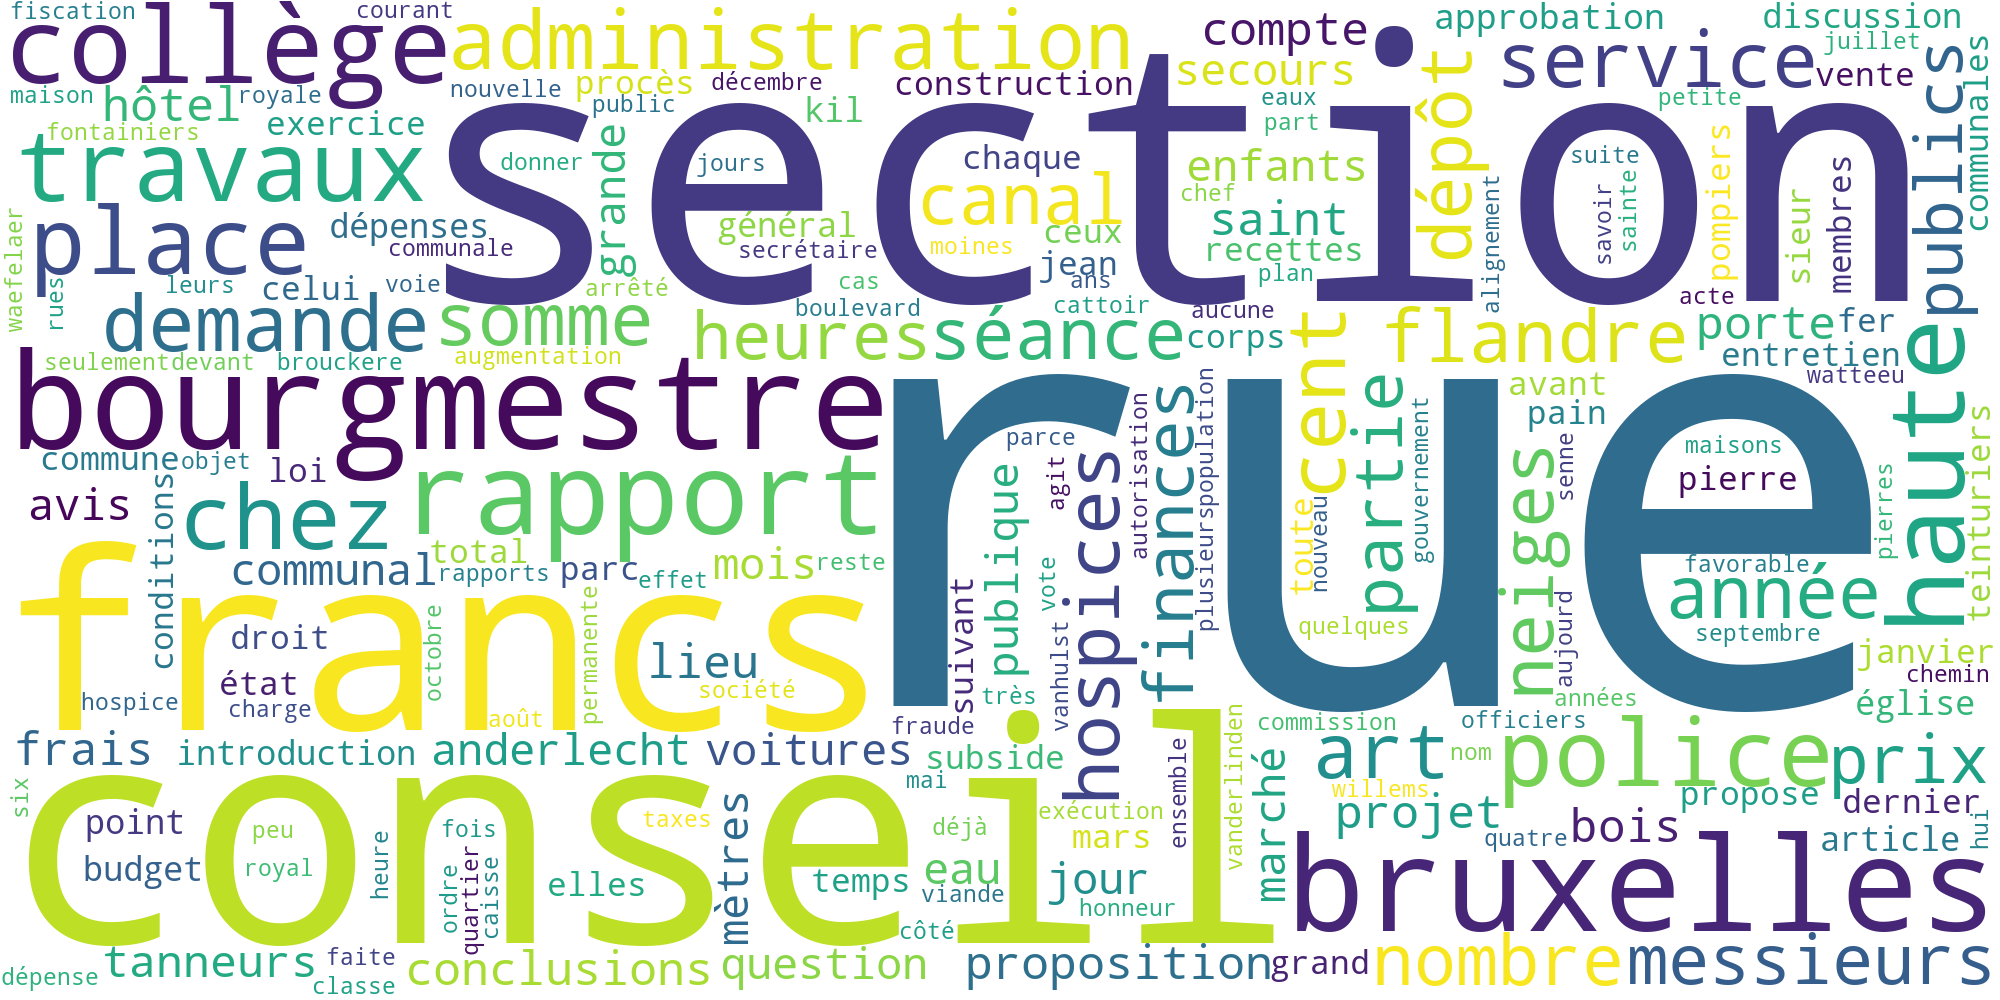

In [72]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## 6. Trouver les entités nommées principales (personnes, organisations et lieux) pertinentes pour l'année 1847

### Importations

In [73]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

### traitements

In [74]:
nlp = spacy.load('fr_core_news_md')

In [76]:
# Appliquer le test sur toutes les phrases
for sent in sentences:
    doc = nlp(sent)
    entities = []
    for ent in doc.ents:
        entities.append(f"{ent.text} ({ent.label_})")
    if entities:
        print(f"'{doc.text}' contient les entités suivantes : {', '.join(entities)}")
    else:
        print(f"'{doc.text}' ne contient aucune entité")

'Apple cherche à acheter une start-up anglaise pour 1 milliard de dollars' contient les entités suivantes : Apple (ORG)
'Les voitures autonomes déplacent la responsabilité de l'assurance vers les constructeurs' ne contient aucune entité
'San Francisco envisage d'interdire les robots coursiers sur les trottoirs' contient les entités suivantes : San Francisco (LOC)
'Londres est une grande ville du Royaume-Uni' contient les entités suivantes : Londres (LOC), Royaume-Uni (LOC)
'L’Italie choisit ArcelorMittal pour reprendre la plus grande aciérie d’Europe' contient les entités suivantes : Italie (LOC), ArcelorMittal (ORG), Europe (LOC)
'Apple lance HomePod parce qu'il se sent menacé par l'Echo d'Amazon' contient les entités suivantes : Apple (ORG), HomePod (ORG), Echo (ORG), Amazon (ORG)
'La France ne devrait pas manquer d'électricité cet été, même en cas de canicule' contient les entités suivantes : La France (LOC)
'Nouvelles attaques de Trump contre le maire de Londres' contient les entit

In [77]:
n=900000
text = open("../data/tmp/1861.txt", encoding='utf-8').read()[:n]

In [78]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 2min 9s, sys: 4.09 s, total: 2min 13s
Wall time: 2min 14s


In [80]:
# Compter les entités
people = defaultdict(int)
organisation = defaultdict(int)
location = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation[ent.text] += 1
    if ent.label_ == "LOC" and len(ent.text) > 3:
        location[ent.text] += 1

### Imprimer les entités trouvées

In [81]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)
sorted_organisation = sorted(organisation.items(), key=lambda kv: kv[1], reverse=True)
sorted_location = sorted(location.items(), key=lambda kv: kv[1], reverse=True)

print("Personnes")
for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")
print("Organisations")
for org, freq in sorted_organisation[:50]:
    print(f"{org} apparait {freq} fois dans le corpus")
print("Locations")
for loc, freq in sorted_location[:50]:
    print(f"{loc} apparait {freq} fois dans le corpus")

Personnes
Bourgmestre apparait 115 fois dans le corpus
Messieurs apparait 98 fois dans le corpus
k i l apparait 45 fois dans le corpus
q u e apparait 33 fois dans le corpus
q u i apparait 30 fois dans le corpus
é t é apparait 29 fois dans le corpus
Watteeu apparait 26 fois dans le corpus
Vanderlinden apparait 26 fois dans le corpus
Anspach apparait 24 fois dans le corpus
M. le Bourgmestre apparait 22 fois dans le corpus
u v é apparait 21 fois dans le corpus
Funck apparait 21 fois dans le corpus
Walter apparait 19 fois dans le corpus
u t i o apparait 19 fois dans le corpus
Veldekens apparait 18 fois dans le corpus
Monsieur le Ministre apparait 18 fois dans le corpus
Depaire apparait 16 fois dans le corpus
Leclercq apparait 16 fois dans le corpus
q u é apparait 16 fois dans le corpus
FONTAINAS apparait 16 fois dans le corpus
Capouillet apparait 15 fois dans le corpus
Echevin Vanderlinden apparait 15 fois dans le corpus
Le Secrétaire apparait 15 fois dans le corpus
Goffart apparait 13 foi

## 7. Sélectionnez arbitrairement 10 phrases dans les documents de l’année 1847 et les analyser

### Importations

In [19]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

### Définission de la fonction d'obtention des sentiments

In [20]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [22]:
get_sentiment("Sons disons que le législateur de 1814 n'a fait que suivre l'esprit du déeret de 1810.")

This text is neutral and perfectly objective.


In [23]:
get_sentiment("Que si cependant on persistait à invoquer l'article 1 de l'arrêté de 1814.")

This text is neutral and 0.35% subjective.


In [24]:
get_sentiment("Toutes les dépenses relatives aux armées de l'Etat sont supportées par le trésor public.")

This text is 0% positive and 0.0875% subjective.


In [25]:
get_sentiment("Tout ce qu'il vous serait possible serait de faire les fondations qui se tasseraient l'hiver prochain.")

This text is 7% positive and 0.13333333333333333% subjective.


In [26]:
get_sentiment("Il est vrai qu'aucun membre de votre administration n'en fait en ce moment partie, comme le veut le susdit article, etc")

This text is 5% positive and 0.4% subjective.


In [27]:
get_sentiment("Lettre de l'administration du mont-de-piété, contenant des renseignemens sur les constructions projetées à cet établissement")

This text is neutral and perfectly objective.


In [28]:
get_sentiment("Le Conseil dans cette séance a amendé quelques articles, et voté l'ensemble à l'unanimité.")

This text is neutral and perfectly objective.


In [29]:
get_sentiment("Voici le texte du cahier des charges avec la discussion sous chaque article.")

This text is neutral and perfectly objective.


In [30]:
get_sentiment("Ceux-ci ne pourront effectuer aucun changement aux bâtimens concédés, aux décorations, au mobilier, à la peinture intérieure, ni aux ornemens en général, sans l'autorisation préalable du collège.")

This text is 4% negative and perfectly objective.


In [31]:
get_sentiment("Les changemens, ainsi autorisés, ne donneront lieu à aucune répétition ou indemnité.")

This text is 5% positive and 0.2% subjective.
